Text(0.5, 1.0, 'Noisy Signal')

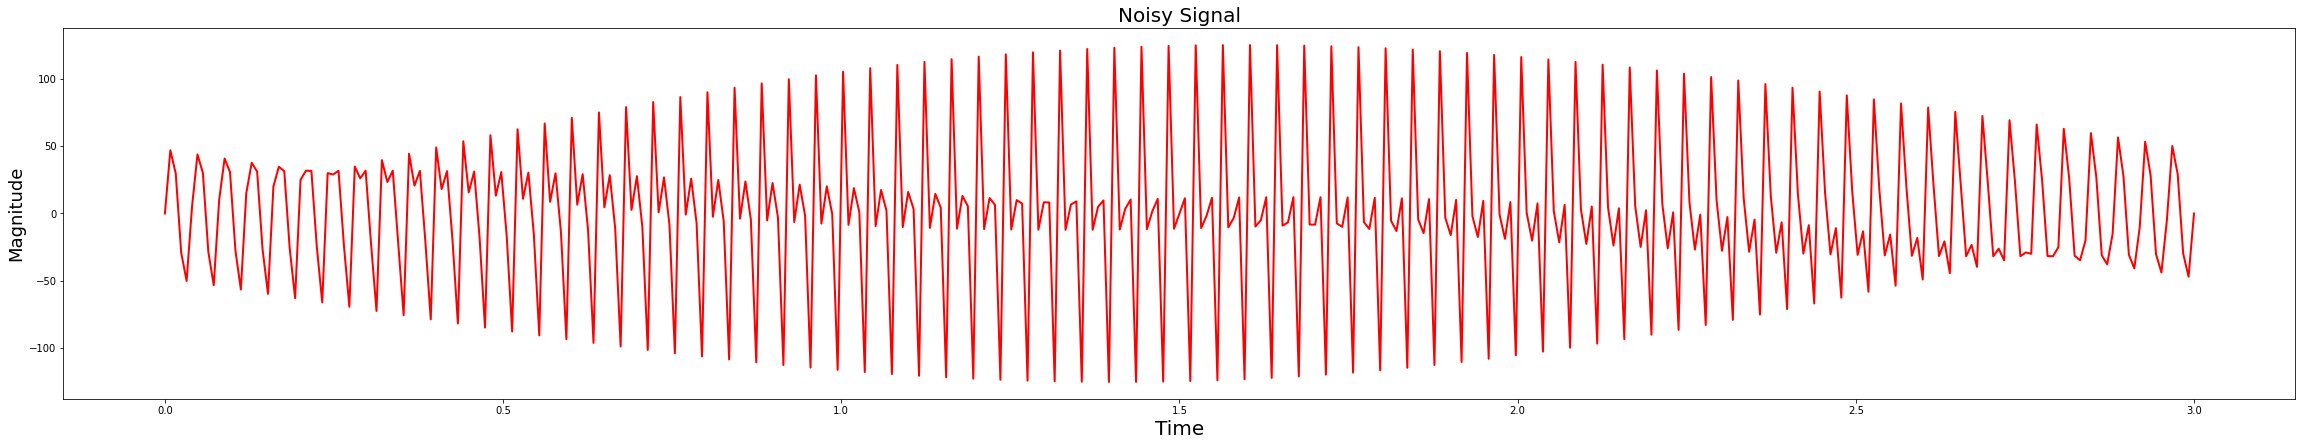

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from math import pi
from scipy import signal

fs = 125  # Sample frequency (Hz)
f0 = 50.0  # Frequency to be removed from signal (Hz)
Q =  0.08  # Quality facor
  
# 25 Hz signal with 50 & 75Hz noise
f1 = 25  
f2 = 50  
f3 = 75 

n = np.linspace(0, 3, fs*3)  
  
# Generate the signal containing f1 and f2 and f3
noisySignal = 50*np.sin(2*np.pi*f1*n) + 50*np.sin(2*np.pi*f2*n) + 50*np.sin(2*np.pi*f3*n) 
  
# Plotting
fig = plt.figure(figsize=(40, 15))
plt.subplot(211)
plt.plot(n, noisySignal, color='r', linewidth=2)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Noisy Signal', fontsize=20)
  


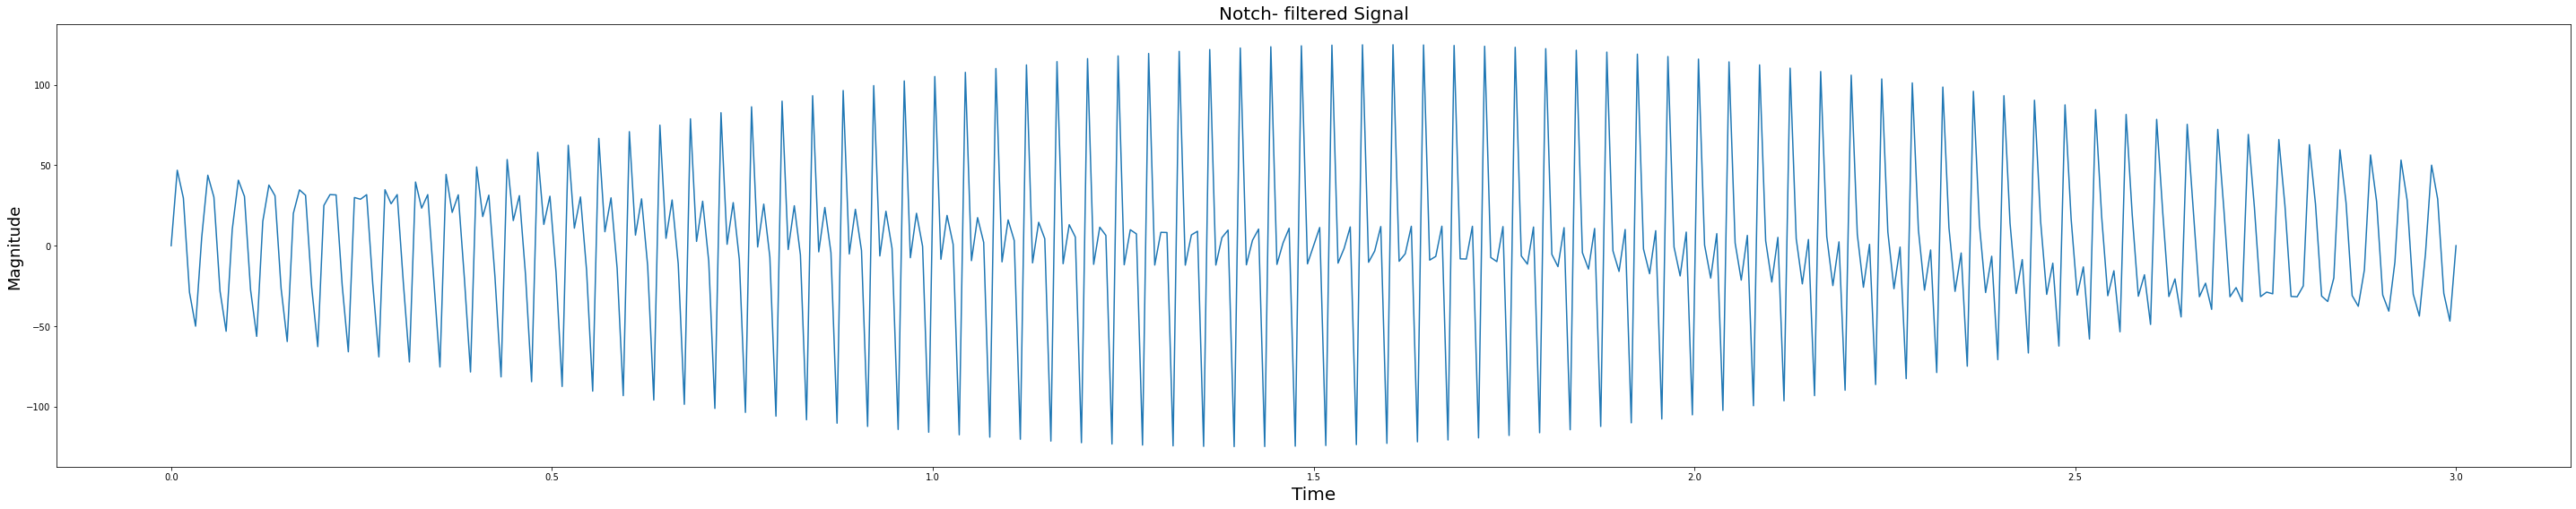

In [2]:
# Design a notch filter using signal.iirnotch
b, a = signal.iirnotch(f0, Q, fs)

# Apply notch filter to the noisy signal using signal.filtfilt
outputSignal = signal.filtfilt(b, a, noisySignal)
fig = plt.figure(figsize=(40, 15))
# Plot notch-filtered version of signal
plt.subplot(211)
  
# Plot output signal of notch filter
plt.plot(n, outputSignal)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Notch- filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()


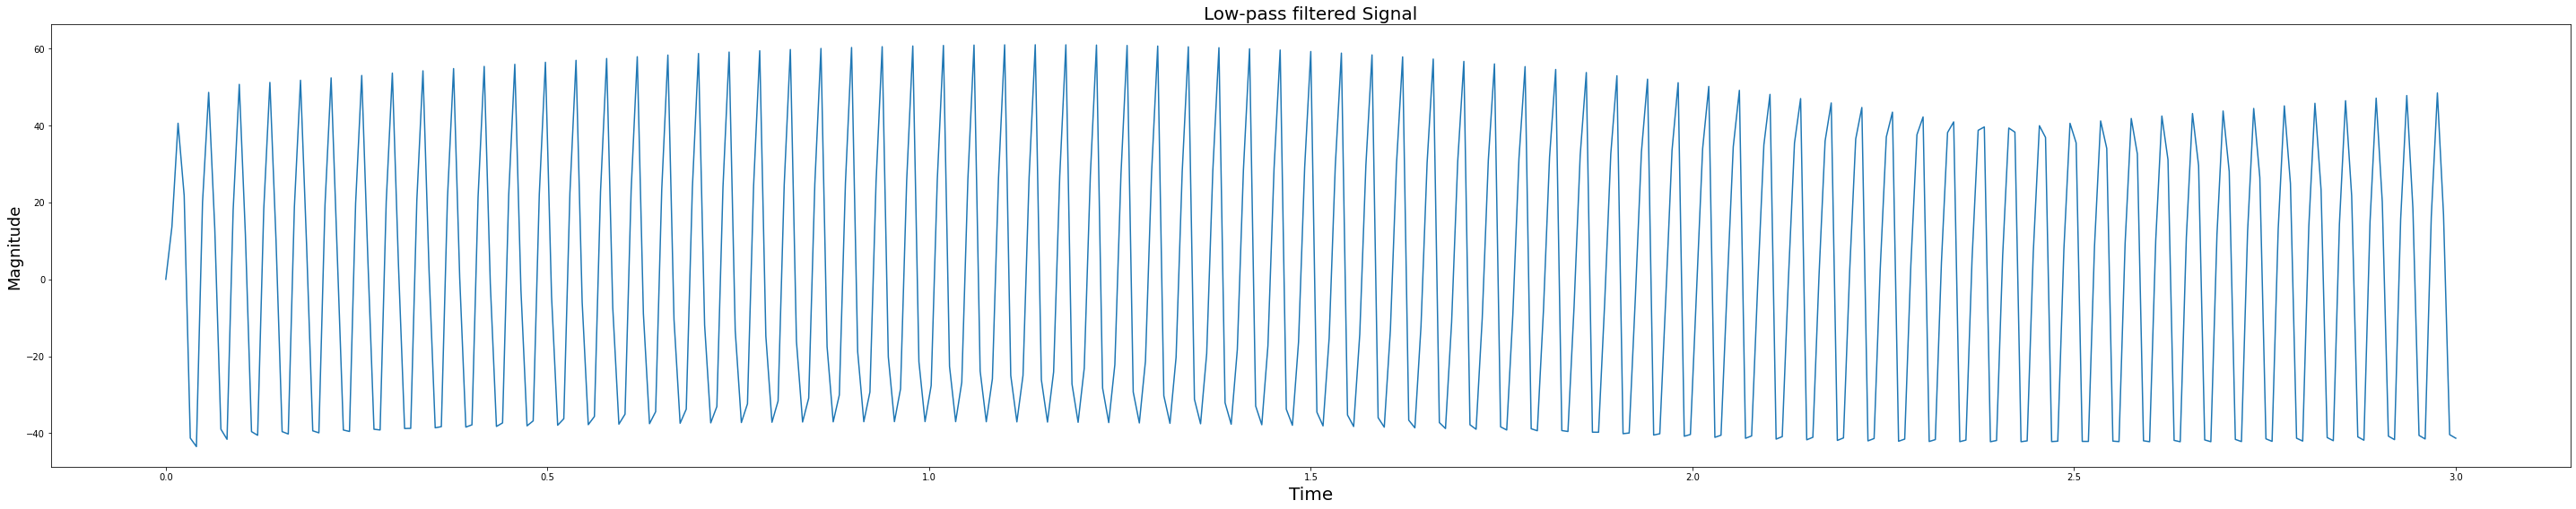

In [3]:
#Generate low-pass filter at 44.5Hz at 125Hz sampling rate
sos = signal.butter(4, 44.5,'lp', fs= fs, output= 'sos')
filtered_Signal = signal.sosfilt(sos, outputSignal)
fig = plt.figure(figsize=(40, 15))
# Plot lowpass-filtered version of signal
plt.subplot(211)
  
# Plot output signal of lowpass filter
plt.plot(n, filtered_Signal)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Low-pass filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

